In [9]:
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
from scripts.parsing_utils import *
from utils.utils import *
from scripts.parse_results import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#RES_DIR = "/home/pari/learned-cardinalities/all_results/inl_fixed_scan_ops/nested_loop_index7/default/lc2/"
#RES_DIR = "./all_results/vldb/test_diff/mscn/lc"

RES_DIR1 = "./all_results/vldb/test_diff/mscn/lc"
RES_DIR = "./all_results/vldb/test_diff/mscn/lc2"

In [35]:
all_df2 = get_all_training_df(RES_DIR)

all_df0 = get_all_training_df(RES_DIR1)
all_df1 = all_df1[all_df1.loss_func == "flow_loss2"]
all_df2 = pd.concat([all_df0, all_df1])

exception caught!
'NoneType' object is not subscriptable
exception caught!
'NoneType' object is not subscriptable
exception caught!
'NoneType' object is not subscriptable
exception caught!
'NoneType' object is not subscriptable
exception caught!
'NoneType' object is not subscriptable


In [36]:
def update_alg_name(df, cols):
    df['alg'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

COLS = ["loss_func"]
COLORS = ["cyan", "green", "orange", "red", "black", "violet", "lightblue", "gray"]


SAVE_DIR ="./figures/results1_lc/"
make_dir(SAVE_DIR)
FN_TMP = "{ERROR_TYPE}-{SAMPLES_TYPE}-{PART}.png"

COLORS = {}
COLORS["Flow Loss"] = "blue"
COLORS["Flow Loss Bitmap"] = "lightblue"

COLORS["Q-Error"] = "green"
COLORS["Q-Error Bitmap"] = "lightgreen"

LINESTYLES = {}
LINESTYLES["Flow Loss"] = ":"
LINESTYLES["Q-Error"] = "--"

LINESTYLES["Flow Loss Bitmap"] =  (0, (3, 10, 1, 10))
LINESTYLES["Q-Error Bitmap"] = (0, (3, 10, 1, 10))

ALG_KEY = {}
ALG_KEY["flow_loss2"] = "Flow Loss"
ALG_KEY["flow_loss2_bitmap"] = "Flow Loss Bitmap"

ALG_KEY["mse"] = "Q-Error"
ALG_KEY["mse_bitmap"] = "Q-Error Bitmap"

ERR_KEYS = {}
ERR_KEYS["jerr"] = "Postgres Plan Error"
ERR_KEYS["mm1_plan_err"] = "Simple Plan Error"
ERR_KEYS["inl_jerr"] = "Postgres INL Plan Error"

ERR_KEYS["qerr"] = "Log Normalized Q-Error"
ERR_KEYS["flow_err"] = "Flow Error"

TITLE_KEYS = {}
TITLE_KEYS["test"] = "Test Set"
TITLE_KEYS["train"] = "Train Set"

In [45]:
# apply all the filter conditions
all_df2.keys()
try:
    all_df2["cost_model"] = all_df2["cost_model"].apply(lambda row: COST_MODEL_NAMES[row])
except:
    pass
update_alg_name(all_df2, COLS)

# if COST_MODEL is not None:
#     all_df2 = all_df2[all_df2["cost_model"] == COST_MODEL]
    
# if MAX_EPOCH is not None:
#     all_df2 = all_df2[all_df2["epoch"] <= max_epoch]
# if HLS is not None:
#     all_df2 = all_df2[all_df2["hidden_layer_size"] == HLS]
    
# HUE_COLORS = {}
# algs = list(set(all_df2["alg_name"]))
# algs.sort()
# for i,alg in enumerate(algs):
#     HUE_COLORS[alg] = COLORS[i]
        
# print(HUE_COLORS)
all_df2 = all_df2[all_df2.epoch <= 9]

In [46]:
df = all_df2[all_df2["template"] == "all"]
df = df[df["num_tables"] == "all"]
df = df[df["summary_type"] == "mean"]
#df = df[df["epoch"] > 1]

#all_df = all_df2[all_df2["template"] != "all"]
#all_df = all_df[all_df["summary_type"] == "mean"]

In [47]:
def plot_learning_curve(df, loss_type, samples_type, part):
    fn = FN_TMP.format(ERROR_TYPE = loss_type,
                       SAMPLES_TYPE = samples_type,
                        PART = part)
    fn = SAVE_DIR + fn
    
    plt.style.use('ggplot')   
    plt.figure(figsize=(5,4))
    plt.title(ERR_KEYS[loss_type] + " (" + TITLE_KEYS[samples_type] + ")")

    
    df = df[df.samples_type == samples_type]
    #df = df[df.partition == part]
    df = df[df.loss_type == loss_type]
    algs = set(df["alg"])
    
#     for alg in algs:
#         tmp_df = df[df.alg == alg]     
#         alg_label = ALG_KEY[alg]

#         y = tmp_df["loss"].values
#         x = tmp_df["epoch"].values
#         plt.plot(x, y, label = alg_label, linestyle=LINESTYLES[alg_label], linewidth=3, color = COLORS[alg_label])
        
#         plt.yscale("log")
#         plt.legend(frameon=False)
    
    sns.lineplot(data=df, hue="alg", x="epoch", y="loss")
    plt.yscale("log")
    #plt.ylim(None,2e6)
    #plt.xticks(range(2,20,2))
    plt.savefig(fn)
    plt.show()

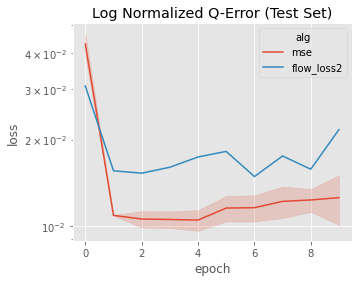

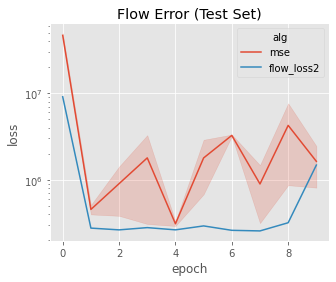

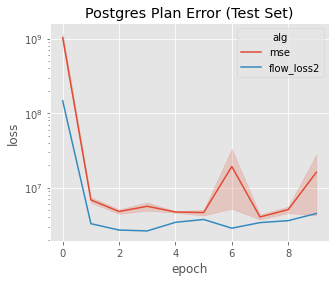

In [48]:
STS = ["test"]
LTS = ["qerr", "flow_err", "jerr"]

for st in STS:
    for lt in LTS:
        plot_learning_curve(df, lt, st, "all")

In [42]:
set(all_df1["max_epochs"])

{15}

In [43]:
set(all_df1["loss_func"])

{'flow_loss2'}

In [ ]:
len(all_df2)